In [49]:
x = c("1", "2", "5", "1", "1")
names(x) <- c("First", "S" ,"T", "Fourth", "Fifth")
res <- x=="1"
y <- x[res]
y

First Fourth  Fifth 
   "1"    "1"    "1"

__This is an example of histograms__

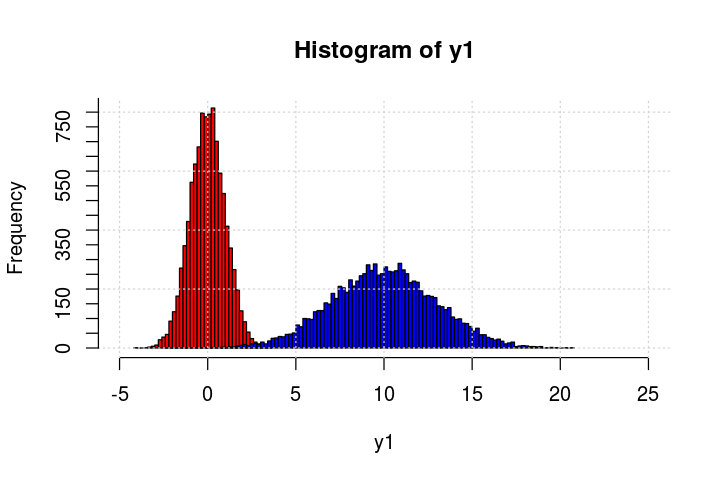

In [55]:
#pdf("toto.pdf")

library(repr)
options(repr.plot.width=6, repr.plot.height=4)

x<-runif(10000)
y1<-qnorm(x)
y2<-qnorm(x, mean=10, sd=3)
hist(y1, breaks=50, xlim=c(-5, 25), col="red", yaxt="n")
hist(y2, breaks=100, add=T, col="blue")
grid()
axis(2, at=seq(0, 2000, by=50))
#dev.off()

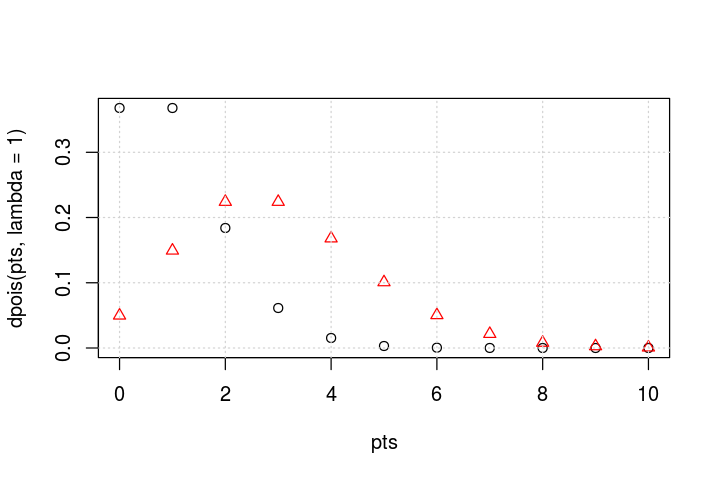

In [22]:
# Poisson example

pts = seq(0, 10, by=1)
plot(pts, dpois(pts, lambda=1))
points(pts, dpois(pts, lambda=3), pch=2, col="red")
grid()

__This is an example of histogram overlayed with some pdfs__

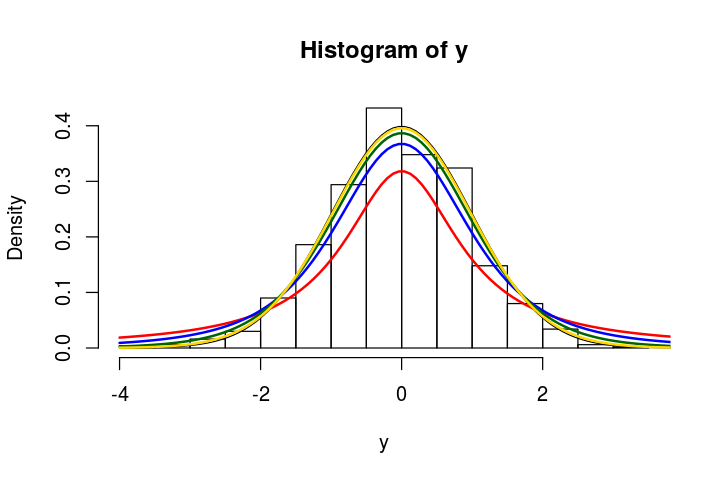

In [23]:
# Display the Student's t distributions with various
# degrees of freedom and compare to the normal distribution

x <- seq(-4, 4, length=100)
hx <- dnorm(x)

degf <- c(1, 3, 8, 30)
colors <- c("red", "blue", "darkgreen", "gold", "black")
labels <- c("df=1", "df=3", "df=8", "df=30", "normal")

y <- rnorm(1000)

hist(y, prob=T)

lines(x, hx)

for (i in 1:4){
  lines(x, dt(x,degf[i]), lwd=2, col=colors[i])
}

#legend("topright", inset=.05, title="Distributions",
#  labels, lwd=2, lty=c(1, 1, 1, 1, 2), col=colors)

__This is an example of plots in multiple pads__


Call:
	density.default(x = age.exploded, adjust = 2)

Data: age.exploded (7545 obs.);	Bandwidth 'bw' = 0.6757

       x                y            
 Min.   :-2.027   Min.   :3.444e-05  
 1st Qu.: 3.986   1st Qu.:4.225e-03  
 Median :10.000   Median :1.787e-02  
 Mean   :10.000   Mean   :4.153e-02  
 3rd Qu.:16.014   3rd Qu.:6.767e-02  
 Max.   :22.027   Max.   :1.496e-01  

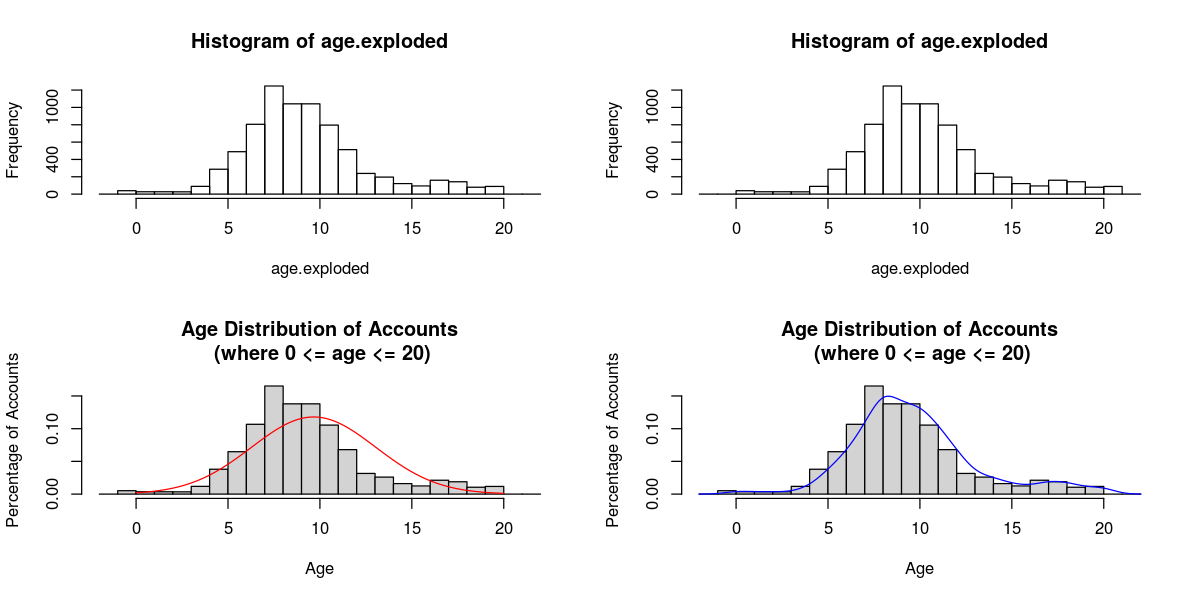

In [24]:
sample_data <- read.csv("test_data.csv")
age.exploded <- rep.int(sample_data$age, sample_data$count)

par(mfrow = c(2, 2))

options(repr.plot.width=10, repr.plot.height=5)

hist(age.exploded, breaks=seq(-2, 22, 1))

hist(age.exploded, breaks=seq(-2, 22, 1), right=F)

hist(age.exploded, breaks=seq(-2, 
  22, by=1), xlab = "Age", ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

mypts<-seq(min(age.exploded), max(age.exploded), length.out=200)

points(mypts, dnorm(mypts, mean(age.exploded), sd(age.exploded)), type="l", col="red")

hist(age.exploded, breaks=seq(-2, 
  22, by=1), xlab = "Age", ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

dens<-density(age.exploded, adjust=2)
dens

lines(dens, col="blue")



__This is an example of histogram overlayed with some other graphics.
Not completely understood as xaxis of the two objects don't match automatically__

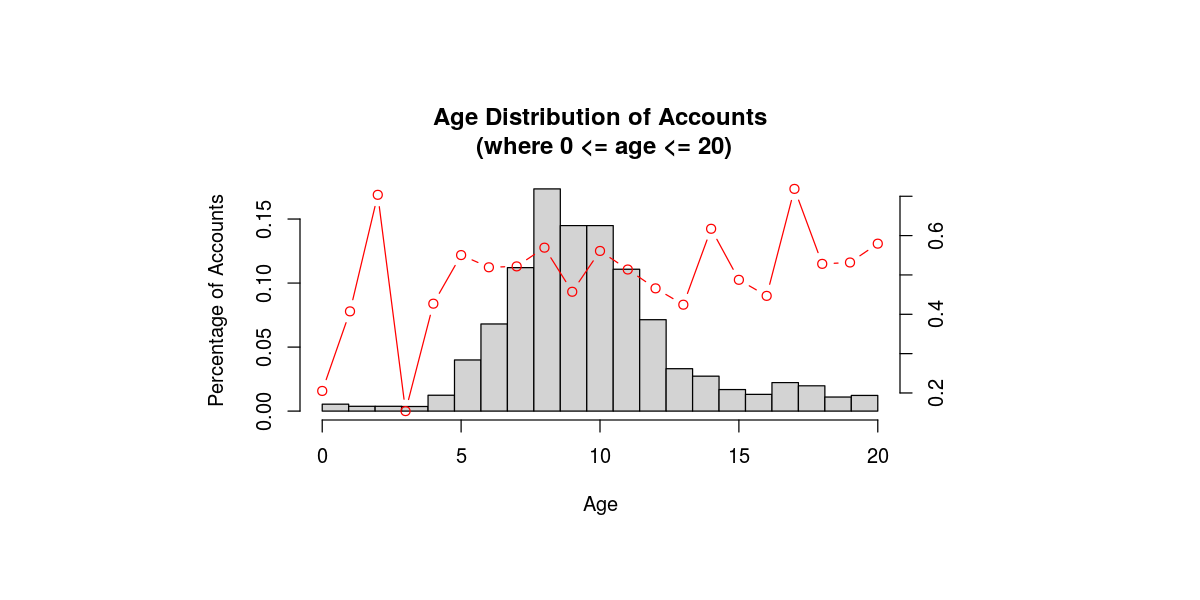

In [25]:
par(pin = c(5, 2))

hist(age.exploded, xlab = "Age", breaks=seq(min(age.exploded), max(age.exploded), length=22), ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

par(new=T)
plot(sample_data$age, sample_data$subscribe_pct, xlab= "", ylab="", type = "b", col = "red", axes=F)   
axis(4)


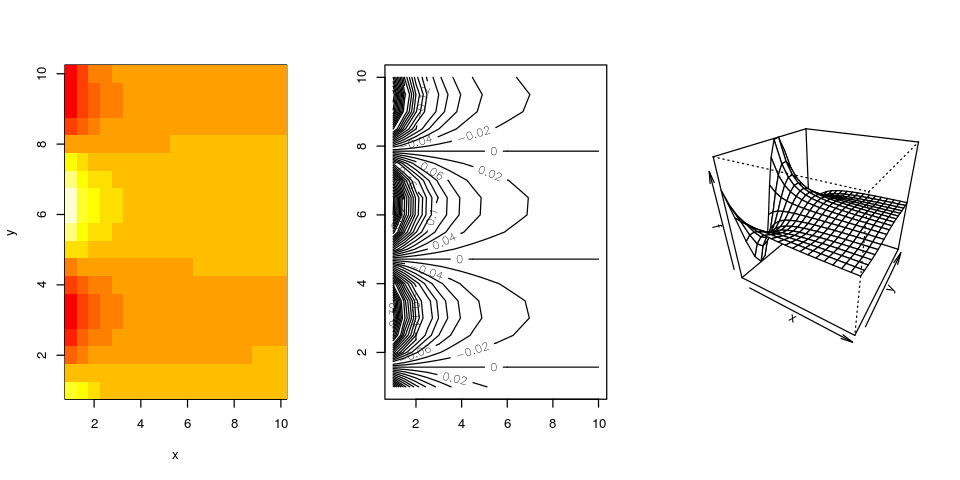

In [80]:
par(mfrow = c(1,3))
options(repr.plot.width=8, repr.plot.height=4)

x = seq(1,10,by=0.5)
y=x
f=outer(x,y,function(x,y)cos(y)/(1+x^2))
image(x,y,f)
contour(x,y,f, nlevels=40)
persp(x,y,f, theta=30, phi=30)

In [76]:
A=matrix(1:16,4,4)
A[-c(1,3),]

2,6,10,14
4,8,12,16


[1] 116.20305  91.80554 102.28725

[1] 92.57562 89.74243 89.31468

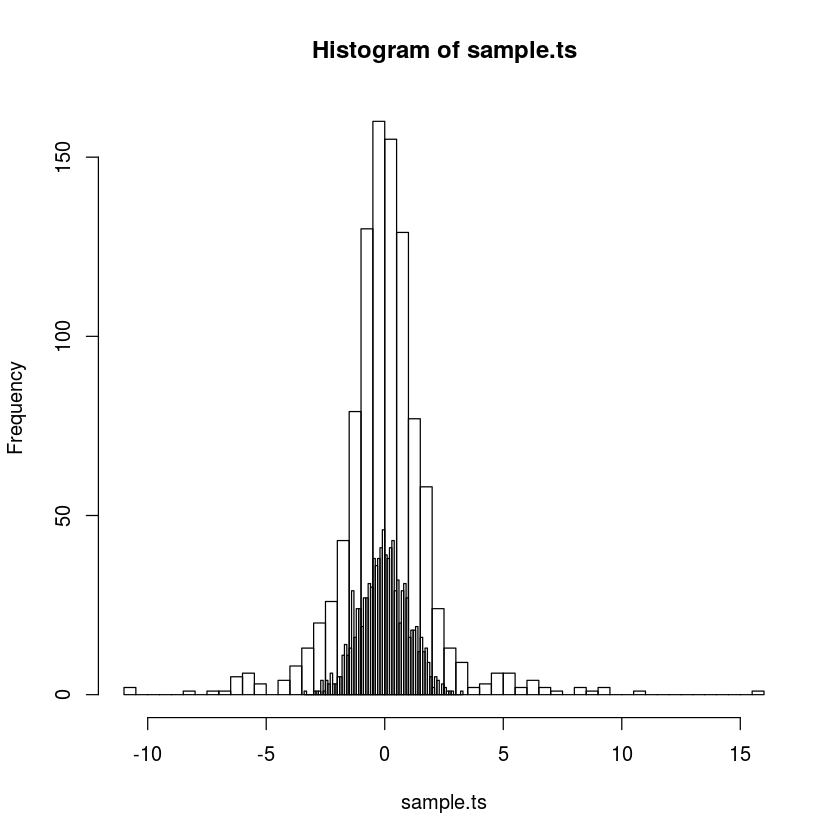

In [11]:
library(ggplot2)
mu.x = 100  # population value
sd.x = 15   # population value
n = 3       # small sample size to highlight t distribution tails
sample.n = function(n){rnorm(n, mu.x, sd.x)}
calculate.t = function(x){(mean(x) - mu.x)/(sd(x)/sqrt(length(x)))} # uses sample sd
calculate.z = function(x){(mean(x) - mu.x)/(sd.x /sqrt(length(x)))} # uses population sd

sample.n(n)
sample.n(n)

sample.ts = replicate(1000, calculate.t(sample.n(n)))
sample.zs = replicate(1000, calculate.z(sample.n(n)))

#df = rbind(data.frame(value=sample.ts, statistic="T"),
#           data.frame(value=sample.zs, statistic="Z"))

#ggplot(df, aes(x=value, fill=statistic))+
#  geom_histogram(position="identity", binwidth=0.2, alpha=0.5)+
#  scale_x_continuous(limits=c(-5,5))